In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('F:\\full practise\\Machine Learning practise set\\income.csv')
df.rename(columns={
    'Income($)' : 'income'
}, inplace= True)
df

,Name,Age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Performing EDA

In [7]:
df.head()

,Name,Age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [9]:
df.tail()

,Name,Age,income
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [13]:
df.describe()

,Age,income
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [15]:
df.isna().sum()

Name      0
Age       0
income    0
dtype: int64

In [17]:
df.shape

(22, 3)

Creating scatter plot

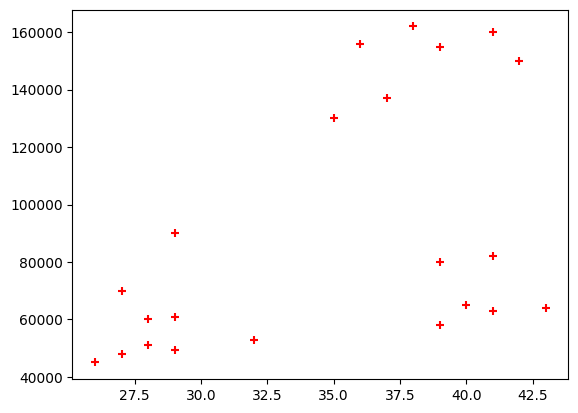

In [20]:
import matplotlib.pyplot as plt 
plt.scatter(df['Age'], df['income'], marker= '+', color = 'r')
plt.show()

Building Clustering model before scaling

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['cluster']=  kmeans.fit_predict(df[['Age','income']])
df

,Name,Age,income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [23]:
kmeans.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

In [25]:
cluster0 = df[df['cluster']==0]
cluster1= df[df['cluster']==1]
cluster2 = df[df['cluster']==2]

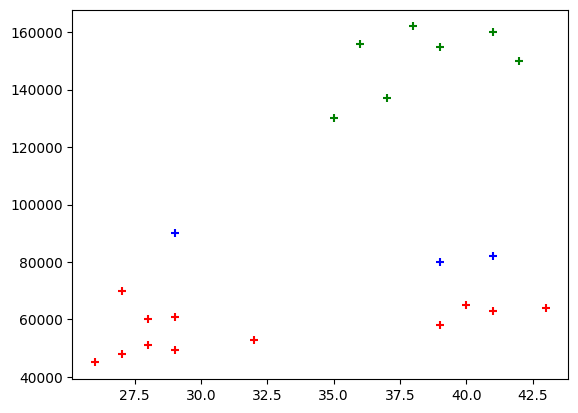

In [28]:
plt.scatter(cluster0['Age'], cluster0['income'], color = 'r', marker= '+')
plt.scatter(cluster1['Age'], cluster1['income'], color = 'g', marker= '+')
plt.scatter(cluster2['Age'], cluster2['income'], color = 'b', marker= '+')
plt.show()

Building clustering model after scaling

In [31]:
from sklearn. preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['income'] = scaler.fit_transform(df[['income']])
df


,Name,Age,income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['cluster']=  kmeans.fit_predict(df[['Age','income']])
df

,Name,Age,income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [33]:
cluster0 = df[df['cluster']==0]
cluster1= df[df['cluster']==1]
cluster2 = df[df['cluster']==2]

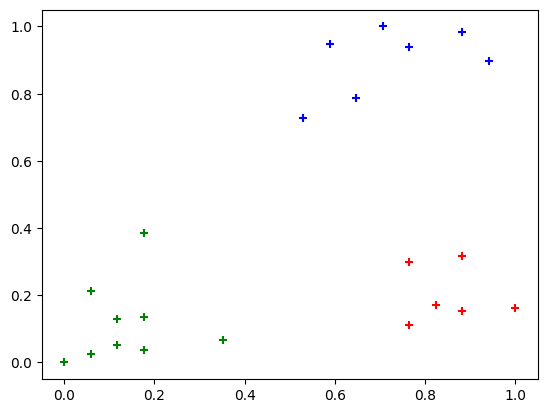

In [34]:
plt.scatter(cluster0['Age'], cluster0['income'], color = 'r', marker= '+')
plt.scatter(cluster1['Age'], cluster1['income'], color = 'g', marker= '+')
plt.scatter(cluster2['Age'], cluster2['income'], color = 'b', marker= '+')
plt.show()

Finding No of clusters by using sum of squared errors

In [36]:
sse = []

for i in range(1,10):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit_predict(df[['Age','income']])
    sse.append(kmeans.inertia_)

sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.3881529166478743,
 0.3071350418475292,
 0.24004511510980914,
 0.19273286467560863,
 0.1393785249550784,
 0.12690685522510567]

Performing Elbow technique to find out the number of clusters

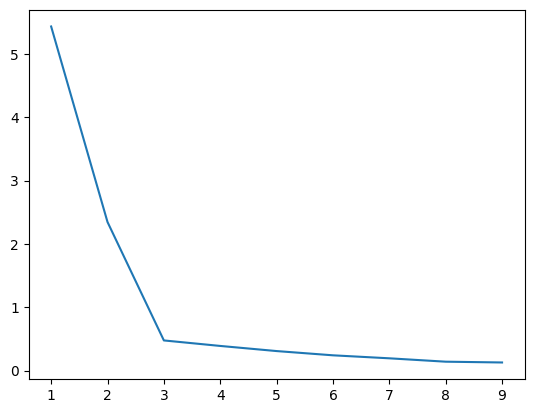

In [37]:
plt.plot(range(1,10), sse)
plt.show()